#  Medical Cost Personal 

In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Origen de dato del dataset
df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/insurance.csv")

In [143]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(1338, 7)

In [144]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [145]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94
1337,61,female,29.07,0,yes,northwest,29141.36


In [146]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [147]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [148]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [149]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [150]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [151]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(1)

In [152]:
# En caso de haber duplicados y que corresponda la eliminación de los mismos
df = df.drop_duplicates()

In [153]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

object     3
int64      2
float64    2
Name: count, dtype: int64

In [154]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

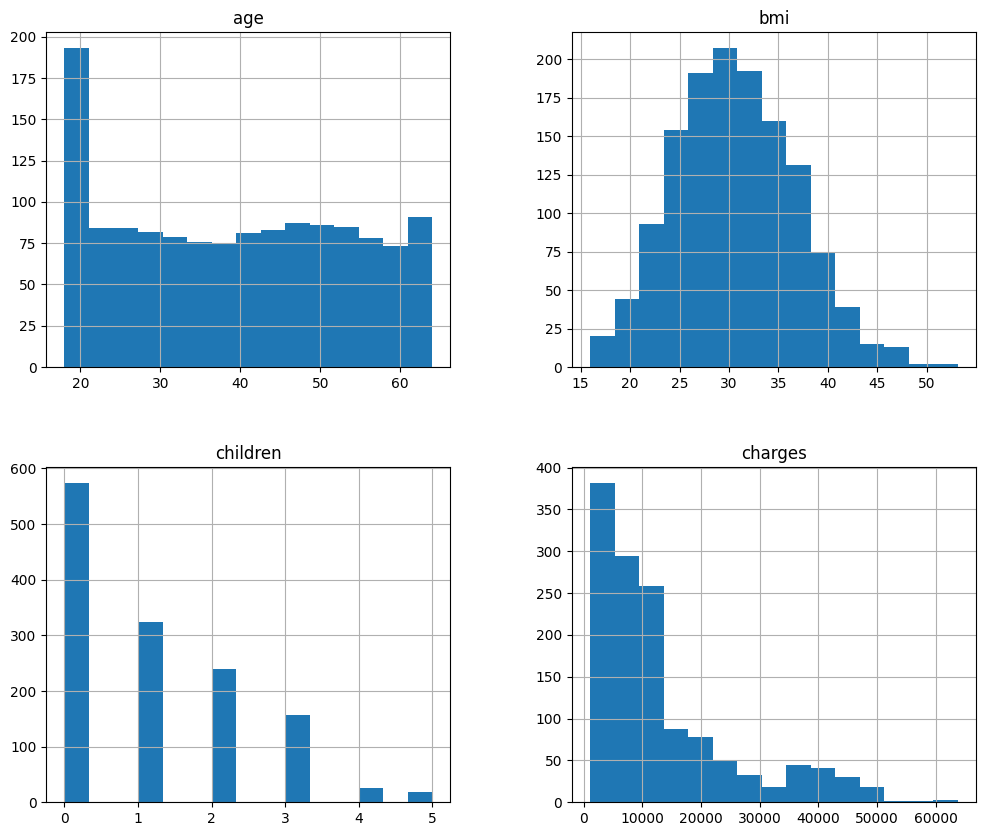

In [155]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

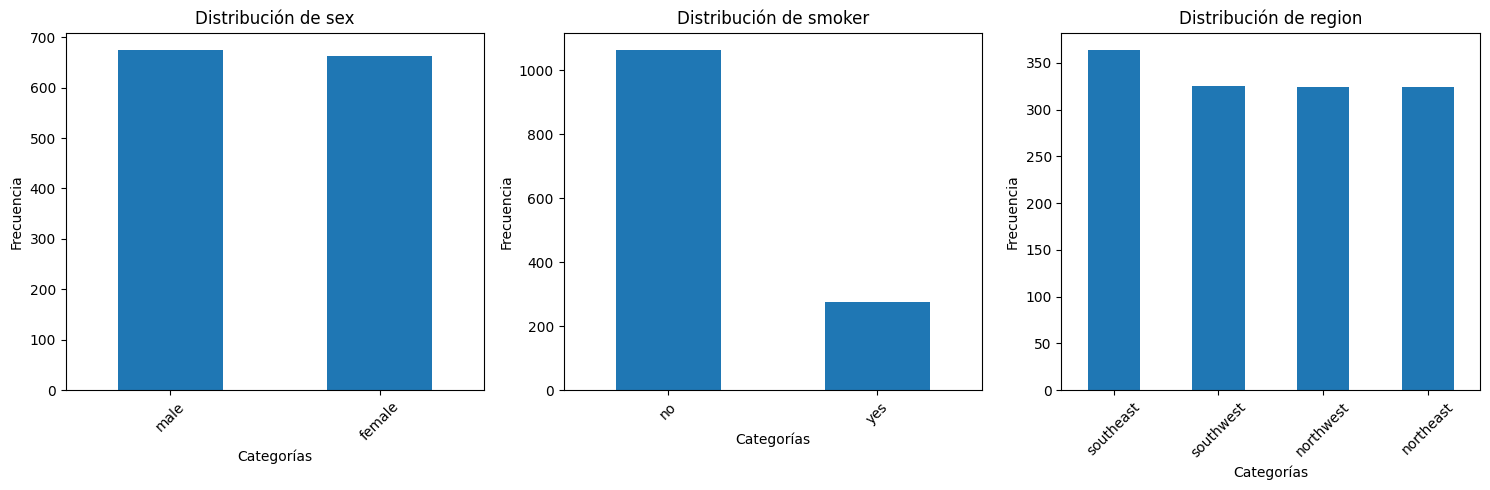

In [156]:
# Seleccionar las columnas categóricas del DataFrame
categorical_columns = df.select_dtypes(include='object').columns

# Definir el tamaño de la figura y el layout de los subplots
num_columns = 3  # Número de columnas de subplots en cada fila
nrows = int(np.ceil(len(categorical_columns) / num_columns))  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=num_columns, figsize=(15, nrows * 5))

# Aplanar los ejes en caso de que haya múltiples filas y columnas
axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generar gráficos de barras en cada subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Seleccionar el eje correspondiente
    df[column].value_counts().nlargest(10).plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas

# Eliminar subplots vacíos si hay menos columnas categóricas que subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])  # Eliminar ejes no utilizados

# Ajustar espacio entre gráficos
plt.tight_layout()
plt.show()

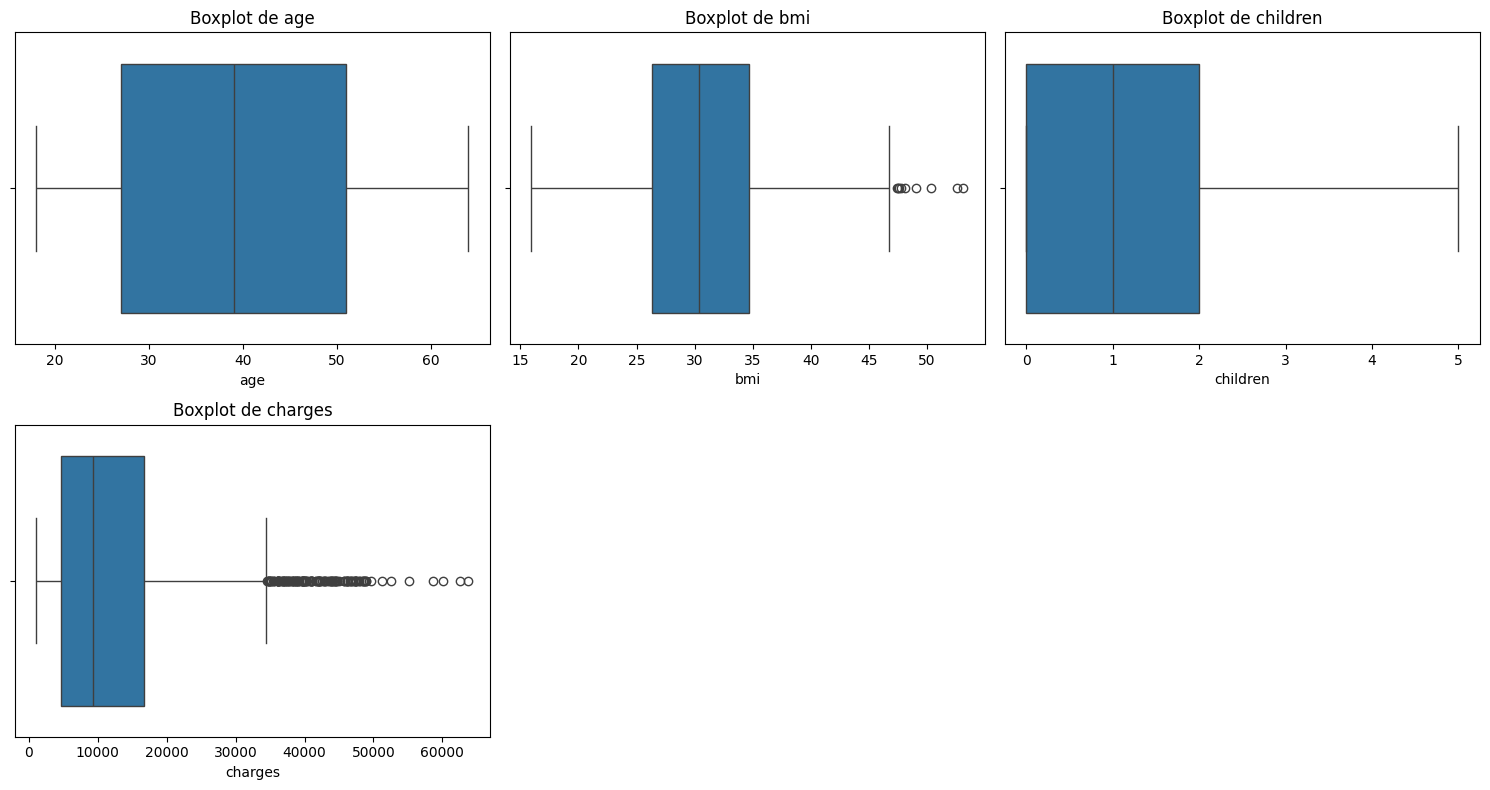

In [157]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [158]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")


age - Número de outliers: 0

bmi - Número de outliers: 9

children - Número de outliers: 0

charges - Número de outliers: 139


In [159]:
# Eliminar los outliers de una columna específica (OJO, el profe nos dijo que para entrenar los modelos es mejor dejarlos y no eliminar)

def eliminar_outliers_columna(df, columna):
    # Copiar el dataframe original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Verificar si la columna está en el dataframe y si es numérica
    if columna in df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el dataframe excluyendo los outliers para la columna indicada
        df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & 
                                          (df_sin_outliers[columna] <= upper_bound)]
    else:
        print(f"La columna '{columna}' no existe o no es numérica.")
    
    return df_sin_outliers


# Ejecutar la función para obtener el dataframe sin outliers en una columna específica
columna_objetivo = 'charges'  # Especifica la columna deseada
df_sin_outliers = eliminar_outliers_columna(df, columna_objetivo)


# Verificar la cantidad de filas antes y después de la limpieza
print(f"Dataframe original: {df.shape}")
print(f"Dataframe sin outliers en '{columna_objetivo}': {df_sin_outliers.shape}")

# Calcular y mostrar la diferencia de filas
diferencia_filas = df.shape[0] - df_sin_outliers.shape[0]
print(f"Diferencia de filas eliminadas: {diferencia_filas}")

# Reemplazar dataset para continuar el analisis
df = df_sin_outliers

Dataframe original: (1337, 7)
Dataframe sin outliers en 'charges': (1198, 7)
Diferencia de filas eliminadas: 139


<Axes: >

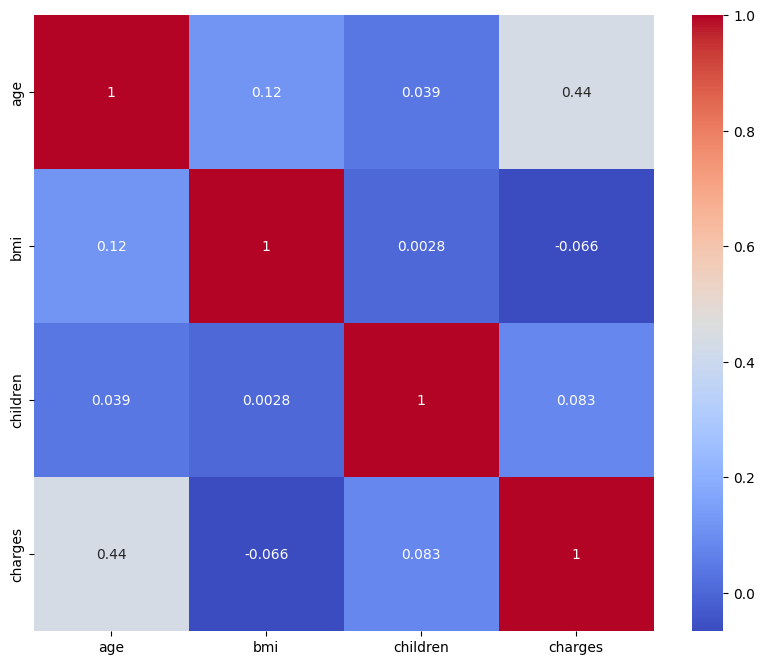

In [160]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

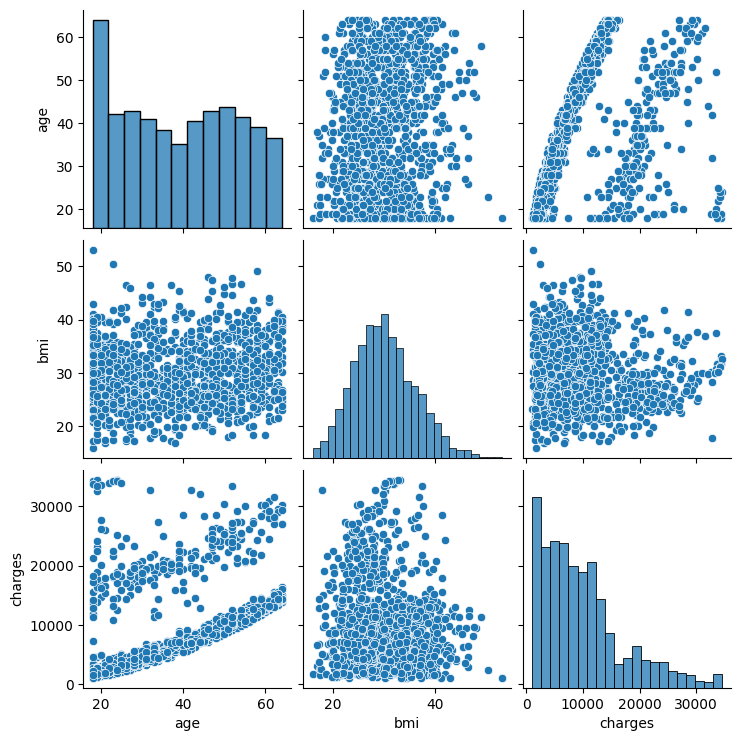

In [161]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.1
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(["charges"], axis=1) # Features
y = df["charges"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [163]:
# LINEAR REGRESSION con Grid Search

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo Linear Regression
param_grid_lr = {
    'lr__fit_intercept': [True, False],  # Si se debe calcular el intercepto
    'lr__copy_X': [True, False]          # Si se debe copiar X antes de ajustarlo
}

# Crear un Pipeline para el modelo Linear Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('lr', LinearRegression())  # Modelo de regresión lineal
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, 
                              cv=5, n_jobs=-1, verbose=1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_lr.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Linear Regression): {grid_search_lr.best_params_}")

# Obtener el mejor modelo de Linear Regression
best_model_lr = grid_search_lr.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_lr = best_model_lr.predict(X_test)

# Calcular las métricas del modelo
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Mostrar resultados
print(f"Resultado del R² de Linear Regression: {r2_lr}")
print(f"Resultado del MSE de Linear Regression: {mse_lr}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores parámetros (Linear Regression): {'lr__copy_X': True, 'lr__fit_intercept': True}
Resultado del R² de Linear Regression: 0.5746461537143137
Resultado del MSE de Linear Regression: 22880829.73678349


In [164]:
# KNN Regressor con GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo KNN Regressor
param_grid_knn = {
    'knn__n_neighbors': list(range(1, 21)),  # Valores de K a probar
    'knn__weights': ['uniform', 'distance'],  # Tipo de ponderación de los vecinos
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para calcular los vecinos
    'knn__p': [1, 2]  # Tipo de distancia (1: Manhattan, 2: Euclidiana)
}

# Crear un Pipeline para el modelo KNN Regressor
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('knn', KNeighborsRegressor())   # Modelo KNN Regressor
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, 
                               cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (KNN Regressor): {grid_search_knn.best_params_}")

# Obtener el mejor modelo de KNN Regressor
best_model_knn = grid_search_knn.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_knn = best_model_knn.predict(X_test)

# Calcular las métricas del modelo
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Mostrar resultados
print(f"Resultado del R² del KNN: {r2_knn}")
print(f"Resultado del MSE del KNN: {mse_knn}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Mejores parámetros (KNN Regressor): {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'uniform'}
Resultado del R² del KNN: 0.5177560209700256
Resultado del MSE del KNN: 25941089.92343005


In [165]:
# Decision Tree Regressor con GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo Decision Tree Regressor
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras por hoja
    'classifier__criterion': ['squared_error', 'absolute_error']  # Criterios válidos
}

# Crear un Pipeline para el modelo Decision Tree Regressor
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', DecisionTreeRegressor(random_state=0))  # Modelo Decision Tree Regressor
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_dt.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Decision Tree Regressor): {grid_search_dt.best_params_}")

# Obtener el mejor modelo de Decision Tree Regressor
best_model_dt = grid_search_dt.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_dt = best_model_dt.predict(X_test)

# Calcular las métricas del modelo
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Mostrar resultados
print(f"Resultado del R² del Decision Tree: {r2_dt}")
print(f"Resultado del MSE del Decision Tree: {mse_dt}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros (Decision Tree Regressor): {'classifier__criterion': 'absolute_error', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Resultado del R² del Decision Tree: 0.5882166749494201
Resultado del MSE del Decision Tree: 22150838.016874783


In [166]:
# Random Forest Regressor con GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Definir los parámetros a buscar para el modelo Random Forest Regressor
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árboles
    'classifier__max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'classifier__min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras por hoja
    'classifier__max_features': ['sqrt', 'log2'],  # Número máximo de características a considerar
    'classifier__criterion': ['squared_error', 'absolute_error']  # Criterios válidos
}

# Crear un Pipeline para el modelo Random Forest Regressor
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesador
    ('classifier', RandomForestRegressor(random_state=42))  # Modelo Random Forest Regressor
])

# Crear el objeto GridSearchCV para la búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, 
                              cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print(f"Mejores parámetros (Random Forest Regressor): {grid_search_rf.best_params_}")

# Obtener el mejor modelo de Random Forest Regressor
best_model_rf = grid_search_rf.best_estimator_

# Hacer predicciones utilizando el mejor modelo
y_pred_rf = best_model_rf.predict(X_test)

# Calcular las métricas del modelo
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Mostrar resultados
print(f"Resultado del R² del Random Forest: {r2_rf}")
print(f"Resultado del MSE del Random Forest: {mse_rf}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros (Random Forest Regressor): {'classifier__criterion': 'absolute_error', 'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Resultado del R² del Random Forest: 0.5762325342035173
Resultado del MSE del Random Forest: 22795494.427867904


In [167]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'R2': [r2_lr, r2_knn, r2_dt, r2_rf],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf]
})

# Imprimir los resultados
print(results)

               Model   R2         MSE
0  Linear Regression 0.57 22880829.74
1                KNN 0.52 25941089.92
2      Decision Tree 0.59 22150838.02
3      Random Forest 0.58 22795494.43


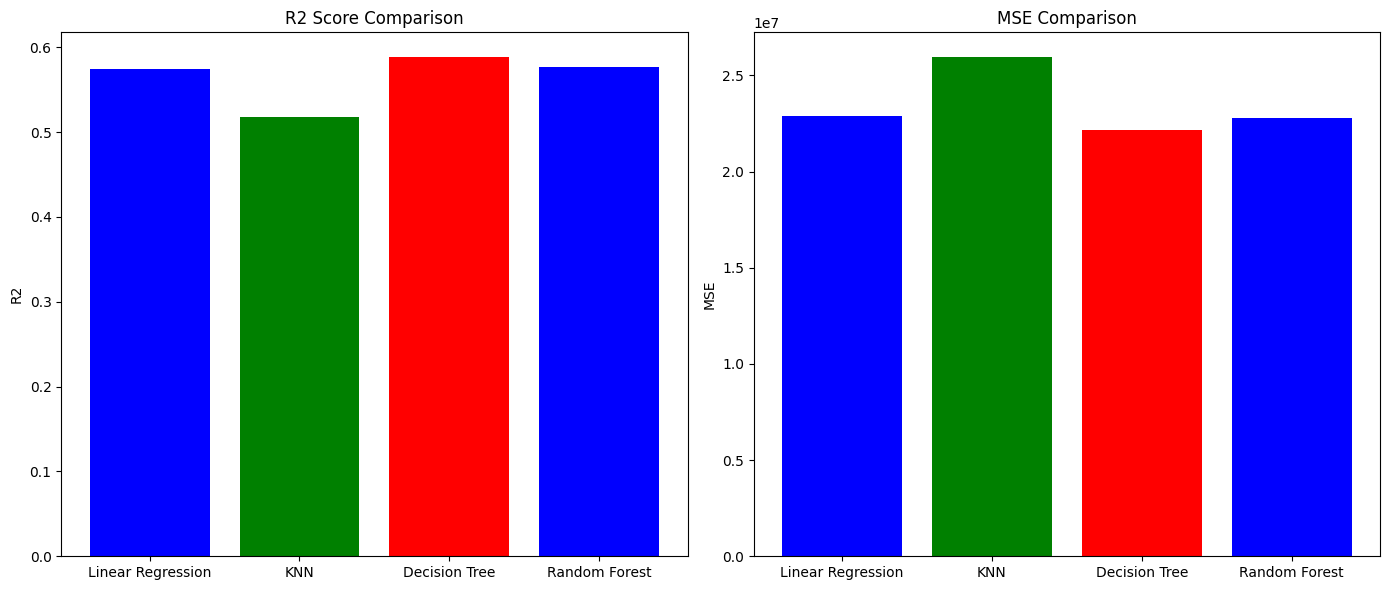

In [168]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de R2
ax[0].bar(results['Model'], results['R2'], color=['blue', 'green', 'red'])
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2')

# Gráfico de MSE
ax[1].bar(results['Model'], results['MSE'], color=['blue', 'green', 'red'])
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

In [169]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lr = measure_training_time(pipeline_lr, X_train, y_train)
time_knn = measure_training_time(pipeline_knn, X_train, y_train)
time_dt = measure_training_time(pipeline_dt, X_train, y_train)
time_rf = measure_training_time(pipeline_rf, X_train, y_train)

# Agregar el tiempo al DataFrame
results['Training Time (s)'] = [time_lr, time_knn, time_dt, time_rf]

# Imprimir los resultados con tiempo de entrenamiento
print(results)

               Model   R2         MSE  Training Time (s)
0  Linear Regression 0.57 22880829.74               0.01
1                KNN 0.52 25941089.92               0.01
2      Decision Tree 0.59 22150838.02               0.01
3      Random Forest 0.58 22795494.43               0.26


In [170]:
# LAZY PREDICT  (para ver cuales son los mejores modelos con los cuales entrenar)

from lazypredict.Supervised import LazyRegressor

# Usar Lazy Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:02<00:00, 16.97it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 958, number of used features: 11
[LightGBM] [Info] Start training from score 9815.590963
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.60       0.61   4568.94   
RandomForestRegressor                        0.57       0.58   4762.06   
KernelRidge                                  0.56       0.58   4777.71   
BayesianRidge                                0.56       0.58   4778.70   
LassoCV                                      0.56       0.58   4779.66   
Ridge                                        0.56       0.58   4779.75   
Ri